In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.0.0'

# Classification

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

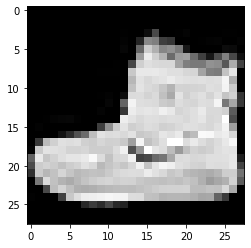

In [10]:
plt.imshow(x_train[0,], cmap="gray")

In [11]:
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2021-11-22 16:33:09.796955: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-22 16:33:09.797363: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


# Define Model 

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                760       
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
weights, bias = model.layers[1].get_weights()

In [18]:
weights

array([[ 7.6497182e-02,  3.4420535e-02, -6.5113991e-02, ...,
        -9.2964247e-03,  6.3723877e-02,  1.0821559e-02],
       [ 3.2904848e-02,  6.7349046e-02,  2.2208616e-03, ...,
        -3.5741590e-02,  2.5399573e-02,  6.2244624e-02],
       [ 1.0840736e-02, -5.4327488e-02, -5.0809979e-03, ...,
         2.4432905e-02, -5.0670505e-03, -5.7763457e-02],
       ...,
       [ 6.5171793e-02,  3.1475253e-02, -3.5604116e-02, ...,
         7.7820137e-02, -8.1731096e-02, -3.4723241e-02],
       [ 7.6096728e-03,  5.1161587e-02,  1.3443105e-02, ...,
         4.2051077e-05,  5.2542835e-02, -3.0556038e-02],
       [-7.5235054e-02,  6.9251835e-02,  4.1194186e-03, ...,
         2.9052235e-02, -5.3423733e-02,  5.3348169e-02]], dtype=float32)

In [19]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile Model

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [21]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/50
51000/51000 [==============================] - 7s 130us/sample - loss: 0.8015 - accuracy: 0.7374 - val_loss: 0.5574 - val_accuracy: 0.8066
Epoch 2/50
51000/51000 [==============================] - 6s 118us/sample - loss: 0.5135 - accuracy: 0.8218 - val_loss: 0.5223 - val_accuracy: 0.8133
Epoch 3/50
51000/51000 [==============================] - 6s 117us/sample - loss: 0.4645 - accuracy: 0.8378 - val_loss: 0.4607 - val_accuracy: 0.8353
Epoch 4/50
51000/51000 [==============================] - 6s 122us/sample - loss: 0.4373 - accuracy: 0.8469 - val_loss: 0.4568 - val_accuracy: 0.8381
Epoch 5/50
51000/51000 [==============================] - 6s 116us/sample - loss: 0.4169 - accuracy: 0.8533 - val_loss: 0.4343 - val_accuracy: 0.8481
Epoch 6/50
51000/51000 [==============================] - 6s 116us/sample - loss: 0.3990 - accuracy: 0.8594 - val_loss: 0.4040 - val_accuracy: 0.8598
Epoch 7/50
51000/51000 [===========================

In [22]:
print(history.history)

{'loss': [0.8014554009297314, 0.5134725752017077, 0.4644911305343404, 0.43727127178743774, 0.41685176661902784, 0.3990297161364088, 0.3873646860403173, 0.37460409784317017, 0.36332189652031543, 0.3547961527927249, 0.3463127553836972, 0.3378796718167324, 0.3303862721218782, 0.3245593805593603, 0.31836912992888805, 0.313604064838559, 0.307276913876627, 0.30268669917536717, 0.29793708866717766, 0.29328694101408415, 0.2897497301195182, 0.28474484836353975, 0.2809650689059613, 0.2768149637708477, 0.273633916582547, 0.2684504963673797, 0.2643759535106958, 0.2610854040828406, 0.25782516686355367, 0.25428069658372915, 0.2522575623521618, 0.2495714419262082, 0.24566107602680431, 0.2427456553145951, 0.23902169691581351, 0.2371268513494847, 0.23449296935983732, 0.2309607482973267, 0.22886653620355268, 0.2256401740271671, 0.22354948408580294, 0.22209053764740627, 0.21846627037197935, 0.2158743189900529, 0.21383453563966004, 0.2122697196205457, 0.21007218057267807, 0.2084560142778883, 0.20522622377

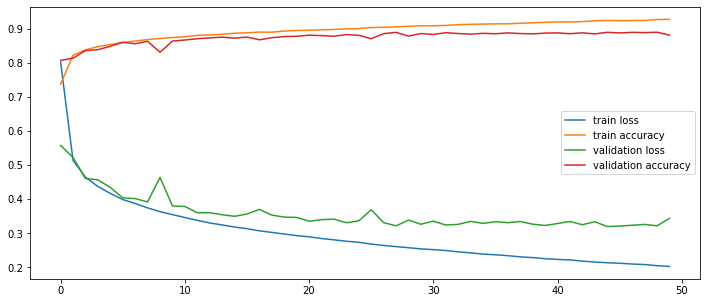

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [26]:
model.evaluate(x_test, y_test, verbose=0)

[0.35327666696310045, 0.8744]

In [29]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

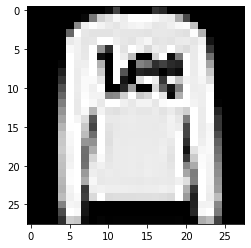

In [36]:
plt.imshow(x3[0], cmap="gray")

In [35]:
model.predict(x3).round(3)

array([[0.   , 0.   , 0.997, 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [34]:
model.predict(x3).shape

(2, 10)

In [41]:
np.argmax(model.predict(x3).round(3), axis=1)

array([2, 1])

In [43]:
y_test[1:3]

array([2, 1], dtype=uint8)

# Regression

In [4]:
california_housing = fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
X_train0, X_test, y_train0, y_test = train_test_split(
                 california_housing["data"],
                 california_housing["target"])

In [6]:
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [7]:
X_test.shape

(5160, 8)

In [8]:
X_train0.shape

(15480, 8)

In [9]:
X_train1.shape

(11610, 8)

In [10]:
X_validation.shape

(3870, 8)

In [11]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [17]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [19]:
model.fit(X_train_s, y_train1, epochs=30,
          validation_data=(X_validation_s, y_validation))

2021-11-22 18:05:52.895162: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-22 18:05:52.895823: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 81us/sample - loss: 0.8384 - mean_absolute_error: 0.6245 - val_loss: 0.4708 - val_mean_absolute_error: 0.4942
Epoch 2/30
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4625 - mean_absolute_error: 0.4853 - val_loss: 0.4039 - val_mean_absolute_error: 0.4551
Epoch 3/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4202 - mean_absolute_error: 0.4605 - val_loss: 0.3798 - val_mean_absolute_error: 0.4343
Epoch 4/30
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4008 - mean_absolute_error: 0.4485 - val_loss: 0.3687 - val_mean_absolute_error: 0.4318
Epoch 5/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3925 - mean_absolute_error: 0.4445 - val_loss: 0.3559 - val_mean_absolute_error: 0.4309
Epoch 6/30
11610/11610 [==============================] - ETA: 0s - loss: 0.3821 - mean_absolute

# Functional API

In [12]:
X_train0.shape[1:]

(8,)

In [13]:
input_ = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

2021-12-04 23:50:07.935738: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-04 23:50:07.936263: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [15]:
model.fit(X_train_s, y_train1, epochs=30,
          validation_data=(X_validation_s, y_validation))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 92us/sample - loss: 3.6808 - mean_absolute_error: 0.6974 - val_loss: 4.1287 - val_mean_absolute_error: 1.5027
Epoch 2/30
11610/11610 [==============================] - 0s 40us/sample - loss: 3.3498 - mean_absolute_error: 0.6484 - val_loss: 0.7603 - val_mean_absolute_error: 0.6167
Epoch 3/30
11610/11610 [==============================] - 0s 40us/sample - loss: 21.5300 - mean_absolute_error: 0.7260 - val_loss: 0.9220 - val_mean_absolute_error: 0.6116
Epoch 4/30
11610/11610 [==============================] - 0s 40us/sample - loss: 1.7546 - mean_absolute_error: 0.5746 - val_loss: 0.5655 - val_mean_absolute_error: 0.5427
Epoch 5/30
11610/11610 [==============================] - 0s 42us/sample - loss: 1.9265 - mean_absolute_error: 0.5611 - val_loss: 0.5411 - val_mean_absolute_error: 0.5297
Epoch 6/30
11610/11610 [==============================] - 1s 50us/sample - loss: 33.9156 - mean

In [12]:
X_train_s_1, X_train_s_2 = X_train_s[:, :6], X_train_s[:, -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[:, :6], X_validation_s[:, -4:]
X_test_s_1, X_test_s_2 = X_test_s[:, :6], X_test_s[:, -4:]

In [23]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_1, input_2], outputs=[output])

In [24]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [26]:
model.fit((X_train_s_1, X_train_s_2), y_train1, epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           y_validation))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 74us/sample - loss: 0.7162 - mean_absolute_error: 0.5870 - val_loss: 7.5694 - val_mean_absolute_error: 0.5735
Epoch 2/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4388 - mean_absolute_error: 0.4794 - val_loss: 0.6560 - val_mean_absolute_error: 0.4922
Epoch 3/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4106 - mean_absolute_error: 0.4644 - val_loss: 1.9041 - val_mean_absolute_error: 0.4977
Epoch 4/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4886 - mean_absolute_error: 0.4788 - val_loss: 1.3351 - val_mean_absolute_error: 0.4826
Epoch 5/30
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4632 - mean_absolute_error: 0.4841 - val_loss: 0.5940 - val_mean_absolute_error: 0.4733
Epoch 6/30
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3869 - mean_a

In [15]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1, name="output")(concatenate_layer)
helper_output = keras.layers.Dense(1, name="helper_output")(hidden_layer2)
model_f = keras.Model(inputs=[input_1, input_2],
                    outputs=[output, helper_output])

2021-12-07 06:53:42.242297: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-07 06:53:42.243829: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model_f.compile(loss=["mse", "mse"],
              loss_weights = [0.8, 0.2],
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [17]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 123us/sample - loss: 1.1322 - output_loss: 1.0414 - helper_output_loss: 1.4967 - output_mean_absolute_error: 0.7255 - helper_output_mean_absolute_error: 0.8704 - val_loss: 0.5576 - val_output_loss: 0.5418 - val_helper_output_loss: 0.6223 - val_output_mean_absolute_error: 0.5409 - val_helper_output_mean_absolute_error: 0.5699
Epoch 2/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5345 - output_loss: 0.5223 - helper_output_loss: 0.5835 - output_mean_absolute_error: 0.5253 - helper_output_mean_absolute_error: 0.5605 - val_loss: 0.4849 - val_output_loss: 0.4727 - val_helper_output_loss: 0.5346 - val_output_mean_absolute_error: 0.4938 - val_helper_output_mean_absolute_error: 0.5367
Epoch 3/30
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4812 - output_loss: 0.4683 - helper_output_loss: 0.5330 - output_mean_absolute_error: 0.4934 

# Subclass API

In [18]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer_1 = keras.layers.Dense(50, activation=activation)
        self.hidden_layer_2 = keras.layers.Dense(10, activation=activation)
        self.final_output   = keras.layers.Dense(1)
        self.helper_output  = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_1, input_2 = inputs
        h1_out = self.hidden_layer_1(input_1)
        h2_out = self.hidden_layer_2(h1_out)
        concat_out = keras.layers.concatenate([input_2, h2_out])
        final_out = self.final_output(concat_out)
        helper_out = self.helper_output(h2_out)
        return final_out, helper_out

In [19]:
model_sub = WideAndDeepANN()

In [20]:
model_sub.compile(loss=["mse", "mse"],
              loss_weights = [0.8, 0.2],
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [21]:
model_sub.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 112us/sample - loss: 1.0452 - output_1_loss: 0.9989 - output_2_loss: 1.2286 - output_1_mean_absolute_error: 0.6595 - output_2_mean_absolute_error: 0.7561 - val_loss: 0.5472 - val_output_1_loss: 0.5280 - val_output_2_loss: 0.6250 - val_output_1_mean_absolute_error: 0.5471 - val_output_2_mean_absolute_error: 0.5681
Epoch 2/30
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5102 - output_1_loss: 0.4921 - output_2_loss: 0.5821 - output_1_mean_absolute_error: 0.5095 - output_2_mean_absolute_error: 0.5612 - val_loss: 0.4623 - val_output_1_loss: 0.4428 - val_output_2_loss: 0.5414 - val_output_1_mean_absolute_error: 0.4777 - val_output_2_mean_absolute_error: 0.5390
Epoch 3/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4703 - output_1_loss: 0.4532 - output_2_loss: 0.5405 - output_1_mean_absolute_error: 0.4835 - output_2_mean_absolute_

In [19]:
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           350         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           510         dense[0][0]                      
______________________________________________________________________________________________

In [28]:
model_f.save("housing_reg_model_f.h5")

In [29]:
model_f_reg = keras.models.load_model("housing_reg_model_f.h5")

In [30]:
model_f_reg.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 50)           350         input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 10)           510         dense_3[0][0]                    
____________________________________________________________________________________________

In [31]:
model_sub.summary()

Model: "wide_and_deep_ann"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  350       
_________________________________________________________________
dense_6 (Dense)              multiple                  510       
_________________________________________________________________
dense_7 (Dense)              multiple                  15        
_________________________________________________________________
dense_8 (Dense)              multiple                  11        
Total params: 886
Trainable params: 886
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_sub.save("housing_reg_model_sub.h5")
#.save_weight()

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

# Callback

In [13]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("model_cb_reg_housing.h5",
                                                         save_best_only=True)
earlystopping_callback = keras.callbacks.EarlyStopping(patience=5,
                             restore_best_weights=True)

In [22]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[model_checkpoint_callback, earlystopping_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3737 - output_loss: 0.3601 - helper_output_loss: 0.4279 - output_mean_absolute_error: 0.4271 - helper_output_mean_absolute_error: 0.4773 - val_loss: 0.5419 - val_output_loss: 0.5688 - val_helper_output_loss: 0.4343 - val_output_mean_absolute_error: 0.4314 - val_helper_output_mean_absolute_error: 0.4714
Epoch 2/5
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5013 - output_loss: 0.5196 - helper_output_loss: 0.4278 - output_mean_absolute_error: 0.4326 - helper_output_mean_absolute_error: 0.4776 - val_loss: 0.5023 - val_output_loss: 0.5214 - val_helper_output_loss: 0.4258 - val_output_mean_absolute_error: 0.4257 - val_helper_output_mean_absolute_error: 0.4720
Epoch 3/5
11610/11610 [==============================] - 1s 60us/sample - loss: 0.6026 - output_loss: 0.6464 - helper_output_loss: 0.4268 - output_mean_absolute_error: 0.4341 - he

In [39]:
class MyCallback(keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        print("")
    def on_epoch_end(self, epoch, logs):
        print(logs["val_loss"])

In [40]:
mycb = MyCallback()

In [41]:
tb_callback = keras.callbacks.TensorBoard("tb_log")

In [25]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[tb_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
 5056/11610 [============>.................] - ETA: 0s - loss: 0.3695 - output_loss: 0.3553 - helper_output_loss: 0.4262 - output_mean_absolute_error: 0.4270 - helper_output_mean_absolute_error: 0.4764

2021-12-07 06:55:25.766564: I tensorflow/core/profiler/lib/profiler_session.cc:184] Profiler session started.


11610/11610 [==============================] - 1s 53us/sample - loss: 0.3706 - output_loss: 0.3571 - helper_output_loss: 0.4245 - output_mean_absolute_error: 0.4251 - helper_output_mean_absolute_error: 0.4751 - val_loss: 0.3793 - val_output_loss: 0.3668 - val_helper_output_loss: 0.4293 - val_output_mean_absolute_error: 0.4233 - val_helper_output_mean_absolute_error: 0.4743
Epoch 2/5
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3789 - output_loss: 0.3676 - helper_output_loss: 0.4241 - output_mean_absolute_error: 0.4247 - helper_output_mean_absolute_error: 0.4744 - val_loss: 0.3784 - val_output_loss: 0.3661 - val_helper_output_loss: 0.4279 - val_output_mean_absolute_error: 0.4235 - val_helper_output_mean_absolute_error: 0.4732
Epoch 3/5
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3654 - output_loss: 0.3508 - helper_output_loss: 0.4235 - output_mean_absolute_error: 0.4232 - helper_output_mean_absolute_error: 0.4742 - val_loss: 0.3703 

In [26]:
%load_ext tensorboard

In [27]:
%tensorboard --logdir=./tb_log 

# Hyperparameter optimization

In [46]:
def ann_model(number_of_hidden_layers=1,
              number_of_neurons=50,
              lr=0.01):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8]))
    for hidden_layer in range(number_of_hidden_layers):
        model.add(keras.layers.Dense(number_of_neurons, activation="selu"))
    model.add(keras.layers.Dense(1))
    sgd = keras.optimizers.SGD(lr=lr)
    model.compile(loss="mse", optimizer=sgd)
    return model

In [47]:
keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)

In [48]:
param_grid = {"number_of_hidden_layers":[1, 3, 5],
              "number_of_neurons":[50, 100, 150],
              "lr":[0.001, 0.001, 0.1]}

In [53]:
keras_sk_reg_gs = GridSearchCV(keras_sk_reg, param_grid)

In [ ]:
keras_sk_reg_gs.fit(X_train_s, y_train1, epochs=10,
                    validation_data=(X_validation, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])